<a href="https://colab.research.google.com/github/BeautyKabore/UNT-DTSC-4050/blob/main/Week_06_Feature_Engineering/BK_Week_06_Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 06 - Feature Engineering

Beauty Kabore

## Getting Started

* Colab - get notebook from gitmystuff DTSC4050 repository
* Save a Copy in Drive
* Remove Copy of
* Edit name
* Take attendance
* Clean up Colab Notebooks folder
* Submit shared link


## Correlation

In statistics, correlation or dependence is any statistical relationship, whether causal or not, between two random variables or bivariate data. Although in the broadest sense, "correlation" may indicate any type of association, in statistics it usually refers to the degree to which a pair of variables are linearly related. Familiar examples of dependent phenomena include the correlation between the height of parents and their offspring, and the correlation between the price of a good and the quantity the consumers are willing to purchase, as it is depicted in the so-called demand curve.

Correlations are useful because they can indicate a predictive relationship that can be exploited in practice. For example, an electrical utility may produce less power on a mild day based on the correlation between electricity demand and weather. In this example, there is a causal relationship, because extreme weather causes people to use more electricity for heating or cooling. However, in general, the presence of a correlation is not sufficient to infer the presence of a causal relationship (i.e., correlation does not imply causation).

https://en.wikipedia.org/wiki/Correlation

In [1]:
# data from https://www.kaggle.com/rohankayan/years-of-experience-and-salary-dataset
import pandas as pd

salary = pd.read_csv('https://raw.githubusercontent.com/gitmystuff/Datasets/main/Salary_Data.csv')
salary.head()

,YearsExperience,Age,Salary
0,1.1,21.0,39343
1,1.3,21.5,46205
2,1.5,21.7,37731
3,2.0,22.0,43525
4,2.2,22.2,39891


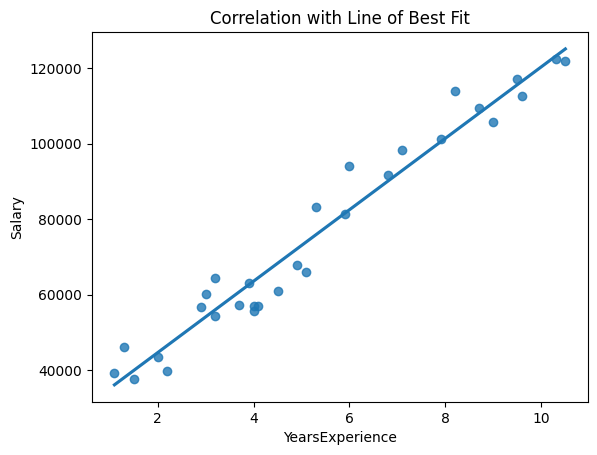

In [4]:
# bivariate scatter plot
import matplotlib.pyplot as plt
import seaborn as sns

sns.regplot(data=salary, x='YearsExperience', y='Salary', ci=False)
plt.title('Correlation with Line of Best Fit');
plt.show()




### Spurious Correlations

https://www.tylervigen.com/spurious-correlations

### Pearson's Correlation Coefficient

A measure of linear correlation between two sets of data. It is the ratio between the covariance of two variables and the product of their standard deviations; thus, it is essentially a normalized measurement of the covariance.

https://en.wikipedia.org/wiki/Pearson_correlation_coefficient

Galton conceived the idea of correlation as a measure of how two variables relate such as heights and arm lengths

$r = \rho_{x,y} = \frac{cov(x,y)}{\sigma_x\sigma_y} = \frac{\frac{1}{N}\sum(x-\bar{x})(y-\bar{y})}{\sqrt\frac{\sum(x-\bar{x})^2}{N}\sqrt\frac{\sum(y-\bar{y})^2}{N}}  = \frac{\sum(x-\bar{x})(y-\bar{y})}{\sqrt{\sum(x-\bar{x})^2}\sqrt{\sum(y-\bar{y})^2}}$

* r has a range of -1 to 1
* When it equals (-)1, one feature can predict another feature precisely
* When it equals 0, the prediction is no better than a random guess
* The slope is agnostic in regards to cause and effect
* One could cause the other, or there may be a third variable controlling both.

$\frac{cov(x,y)}{\sigma_x\sigma_y} = \frac{\frac{1}{N}\sum(x-\bar{x})(y-\bar{y})}{\sqrt\frac{\sum(x-\bar{x})^2}{N}\sqrt\frac{\sum(y-\bar{y})^2}{N}}$

* Covariance measures the directional relationship between the returns on two assets. A positive covariance means asset returns move together, while a negative covariance means they move inversely. Covariance is calculated by analyzing at-return surprises (standard deviations from the expected return) or multiplying the correlation between the two random variables by the standard deviation of each variable. https://www.investopedia.com/terms/c/covariance.asp
* A standard deviation (or σ) is a measure of how dispersed the data is in relation to the mean. Low standard deviation means data are clustered around the mean, and high standard deviation indicates data are more spread out. https://www.nlm.nih.gov/nichsr/stats_tutorial/section2/mod8_sd.html

**r = 1**

r =  1.0


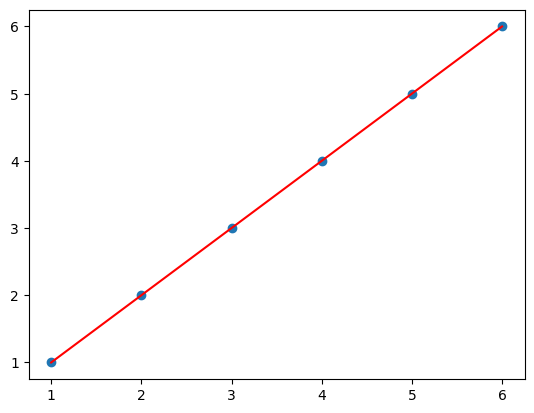

In [5]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

y = pd.Series([1, 2, 3, 4, 5, 6])
x = pd.Series([1, 2, 3, 4, 5, 6])

correlation = y.corr(x)
print('r = ', correlation)

# plotting the data
plt.scatter(x, y)

# This will fit the best line into the graph
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))
         (np.unique(x)), color='red');

**r = -1**

r =  -1.0


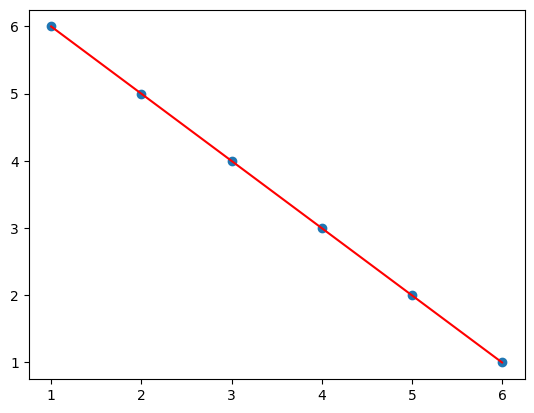

In [6]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

y = pd.Series([1, 2, 3, 4, 5, 6])
x = pd.Series([6, 5, 4, 3, 2, 1])

correlation = y.corr(x)
print('r = ', correlation)

# plotting the data
plt.scatter(x, y)

# This will fit the best line into the graph
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))
         (np.unique(x)), color='red');

**r = 0**

r =  0.0


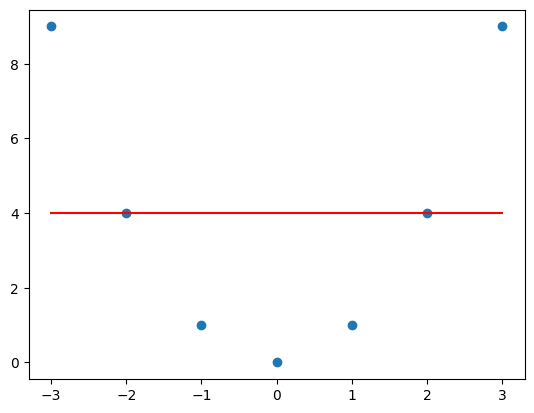

In [7]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

y = pd.Series([9, 4, 1, 0, 1, 4, 9])
x = pd.Series([-3, -2, -1, 0, 1, 2, 3])

correlation = y.corr(x)
print('r = ', correlation)

plt.scatter(x, y)

# line of best fit
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))
         (np.unique(x)), color='red');

In [8]:
# import pandas as pd

# salary.corr()
salary.corr()

,YearsExperience,Age,Salary
YearsExperience,1.000000,0.987258,0.978242
Age,0.987258,1.000000,0.974530
Salary,0.978242,0.974530,1.000000


### Spearman's Rank Correlation

$\rho = 1 - \frac{6\sum{d_i^2}}{n(n^2-1)}$

* $\rho$ = Spearman's rank correlation coefficient
* $d^i$ = difference between the two ranks of each observation
* $n$ = number of observations

Definition

* A Spearman correlation coefficient is also referred to as Spearman rank correlation or Spearman’s rho.  It is typically denoted either with the Greek letter rho (ρ), or rs.  Like all correlation coefficients, Spearman’s rho measures the strength of association between two variables.  As such, the Spearman correlation coefficient is similar to the Pearson correlation coefficient.

Sources
* https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/spearman-rank-correlation/
* https://en.wikipedia.org/wiki/Spearman's_rank_correlation_coefficient

In [9]:
# data from https://data.mendeley.com/datasets/tttrffnjtd/1
import pandas as pd

spearman = pd.read_excel('https://raw.githubusercontent.com/gitmystuff/Datasets/main/Spearman.xls', index_col=0)
spearman.head()

,Gender,Age,Language,Qualification,Education,IQ1,IQ2,IQ3,SYSQ1,SYSQ2,...,SVQ2,SVQ3,EQ1,EQ2,UF1,UF2,UF3,UX1,UX2,NPB
2022-04-05 19:20:25.024,Male,20-35,Bengali,Post Graduate and above,Rs 5 Lakhs or below,4,3,3,5,5,...,4,5,4,3,5,5,5,5,5,4
2022-04-05 19:22:11.546,Male,20-35,Bengali,Post Graduate and above,Above Rs 25 Lakhs,4,4,4,4,5,...,4,4,5,5,4,5,5,5,5,5
2022-04-05 19:27:16.060,Male,50-65,Bengali,Post Graduate and above,Rs 15 Lakhs to Rs 25 Lakhs,4,4,4,4,4,...,5,5,5,5,5,5,5,5,4,5
2022-04-05 19:29:48.477,Female,50-65,Bengali,Graduate,Rs 5 Lakhs or below,4,5,4,5,5,...,5,4,4,4,5,5,5,5,4,4
2022-04-05 19:34:17.867,Female,35-50,Bengali,Post Graduate and above,Rs 5 Lakhs to Rs 15 Lakhs,4,2,3,2,2,...,5,5,5,5,5,5,5,4,4,5


In [12]:
# method = spearman
spearman._get_numeric_data().corr(method='spearman')

,IQ1,IQ2,IQ3,SYSQ1,SYSQ2,SYSQ3,SYSQ4,SVQ1,SVQ2,SVQ3,EQ1,EQ2,UF1,UF2,UF3,UX1,UX2,NPB
IQ1,1.000000,0.689451,0.692198,0.625820,0.627171,0.619996,0.541418,0.413641,0.585208,0.562872,0.512722,0.470861,0.351162,0.225814,0.554607,0.569008,0.530413,0.442318
IQ2,0.689451,1.000000,0.698492,0.677913,0.654495,0.533591,0.426920,0.459976,0.558681,0.394556,0.323850,0.403384,0.451994,0.259165,0.507601,0.563795,0.576108,0.493849
IQ3,0.692198,0.698492,1.000000,0.615260,0.608631,0.626732,0.505323,0.450619,0.484326,0.425282,0.474847,0.389452,0.294997,0.163081,0.514418,0.529320,0.599512,0.534711
SYSQ1,0.625820,0.677913,0.615260,1.000000,0.879606,0.827439,0.654240,0.537456,0.602261,0.460598,0.411374,0.332931,0.521958,0.346308,0.585203,0.758343,0.781700,0.657199
SYSQ2,0.627171,0.654495,0.608631,0.879606,1.000000,0.840586,0.565461,0.440567,0.548677,0.505371,0.415910,0.341684,0.423973,0.281740,0.644982,0.718201,0.756991,0.607251
SYSQ3,0.619996,0.533591,0.626732,0.827439,0.840586,1.000000,0.579992,0.511225,0.598565,0.571292,0.404503,0.403673,0.377868,0.231650,0.673915,0.648560,0.821482,0.607954
SYSQ4,0.541418,0.426920,0.505323,0.654240,0.565461,0.579992,1.000000,0.513290,0.575202,0.544200,0.532242,0.283109,0.390903,0.371876,0.579914,0.672280,0.540083,0.552675
SVQ1,0.413641,0.459976,0.450619,0.537456,0.440567,0.511225,0.513290,1.000000,0.674643,0.272984,0.349210,0.303652,0.429731,0.356379,0.473634,0.483821,0.523323,0.528926
SVQ2,0.585208,0.558681,0.484326,0.602261,0.548677,0.598565,0.575202,0.674643,1.000000,0.536198,0.523022,0.484820,0.546744,0.284289,0.646615,0.643224,0.533548,0.493783
SVQ3,0.562872,0.394556,0.425282,0.460598,0.505371,0.571292,0.544200,0.272984,0.536198,1.000000,0.459637,0.458698,0.361346,0.135603,0.592400,0.515253,0.440333,0.389876


## Some History

Content for the following individuals draw heavily on Wikipedia and The Book of Why Chapter 2 by Judea Pearl and Dana Mackenzie

### Pearson

* That's Karl Pearson with a C
* Pearson felt that Galton did away with causation and 1 was just perfect correlation
* Data is all there is to science
* Galton says that relationships didn't need a casual explanation
* Pearson went further by removing causation from science
* Pearson belonged to the Positivist School which holds that the universe is a product of human thought and that science is just the expression of these thoughts
* Thus causation, outside our thoughts, does not exist
* Thoughts can only reflect patterns of observations and can be completely described by correlations

### Pearson's Background

* 1857 - 1936
* An English mathematician and biostatistician
* Spent most of the 1880s in Germany / Austria
* Loved Germany so much he changed his name from Carl to Karl
* A women's right and equality activist, founder of the Men and Women's Club
* A socialist that offered help translating some of Karl Marx's work (Das Kapital)
* Secured a grant for a biometrics lab at the University of College London
* The lab became a department when Galton passed and left an endowment for a professorship as long as Pearson was the first holder
* Had to explain what he calls genuine (organic) correlation and spurious correlation
* For example, there's a strong correlation between a country's chocolate consumption and Nobel Prize winners

### Sewall Wright and Guinea Pigs

* 1889 - 1988
* Wright went to Harvard to study genetics and about 1915 got a job with the USDA taking care of Guinea Pigs
* The Guinea Pigs turned out to be the spring board to Wright's success
* Evolution was not gradual, as Darwin posited, but happens in bursts
* 1925, Wright was faculty at University of Chicago and stayed close to Guinea Pigs
* A story is that he was handling a Gunea Pig while lecturing at the chalk board and mistanely used the Guinea Pig to erase the board
* Guinea Pig coat color refused to play by the genetic understanding of the time
* It proved impossible to breed an all white / all colored guinea pig
* Even the most inbred had a wide variation
* Wright postulated that genetics alone governed coat color and added developmental factors in the womb
* Something in the womb was `causing` coat color
* 20 generations eliminated the genetic variation while maintaining the developmental factors
* Wright, even though right, was severely attacked at the time by Pearson's disciples

### R. A. Fisher

* 1890 - 1962
* Popularized the p-value
* Linear discriminant analysis
* F-distribution
* Student's t-distribution
* He was from an early age a supporter of certain eugenic ideas, and it is for this reason that he has been accused of being a racist and an advocate of forced sterilisation (Evans 2020). His promotion of eugenics has recently caused various organisations to remove his name from awards and dedications of buildings (Tarran 2020; Rothamsted Research 2020; Society for the Study of Evolution 2020; Gonville and Caius College 2020). https://www.nature.com/articles/s41437-020-00394-6
* Rival with Wright
* Worked as a statistician in the City of London and taught physics and maths
* Statistics my be regarded as the study of methods of the reductions of data
* Wright argued that statistics was more than just a collection of mathematical methods


## Example of Engineering a Feature by Transforming its Values

### Logarithm and Moore's Law

Moore's law is the observation that the number of transistors in a dense integrated circuit (IC) doubles about every two years. Moore's law is an observation and projection of a historical trend. Rather than a law of physics, it is an empirical relationship linked to gains from experience in production.

https://en.wikipedia.org/wiki/Moore's_law

In [13]:
# get the data
import pandas as pd

moores = pd.read_csv('https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv', header=None)
moores.columns = ['year', 'transistors']
moores.head()

,year,transistors
0,1971,2300
1,1972,3500
2,1973,2500
3,1973,2500
4,1974,4100


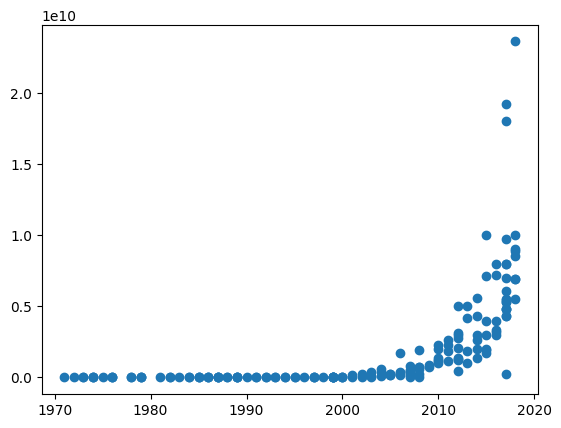

In [14]:
# plot the data
import matplotlib.pyplot as plt

#year is the x, transistors is y, moores is the dataframe
plt.scatter(moores['year'], moores['transistors']);

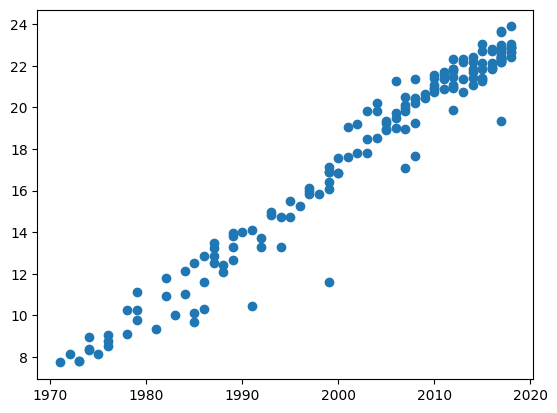

In [15]:
# # apply log to transistors
# import numpy as np

# moores['log_trans'] = np.log(moores.transistors)
# plt.scatter(moores['year'], moores['log_trans']);
import numpy as np
moores['log_trans'] = np.log(moores.transistors)
plt.scatter(moores['year'], moores['log_trans'])

### More on Logarithms

* 10 * 10 (10 and 100)
* 10 * 10 * 10 (10 and 1000)
* power of 0 = 1 (single item)
* power of 1 = 10
* power of 3 = thousand
* power of 6 = million
* power of 9 = billion
* power of 12 = trillion
* power of 23 = number of molecules in a dozen grams of carbon
* power of 80 = number of molecules in the universe

A 0 to 80 scale took us from a single item to the number of things in the universe.

https://betterexplained.com/articles/using-logs-in-the-real-world/

### Multicollinearity

* Makes it difficult to determine which independent variables are influencing the dependent variable

### Correlation vs Multicollinearity

* Correlation measures how two or more variables move together (good between independent and dependent variables)
* (Mutli)collinearity shows a linear relationship, usually high, between features

### Correlation Between Features

* anything above .9 do something about it
* between .5 and .7 may need a closer look

In [18]:
# data from https://www.kaggle.com/rohankayan/years-of-experience-and-salary-dataset
import pandas as pd

salary = pd.read_csv('https://raw.githubusercontent.com/gitmystuff/Datasets/main/Salary_Data.csv')
salary.head()

,YearsExperience,Age,Salary
0,1.1,21.0,39343
1,1.3,21.5,46205
2,1.5,21.7,37731
3,2.0,22.0,43525
4,2.2,22.2,39891


In [19]:
# X_salary = salary.drop('Salary', axis=1)
# y_salary = salary['Salary']
# X_salary.corr()
#axis tells if its a row or column, 1 = column
X_salary = salary.drop('Salary', axis= 1)

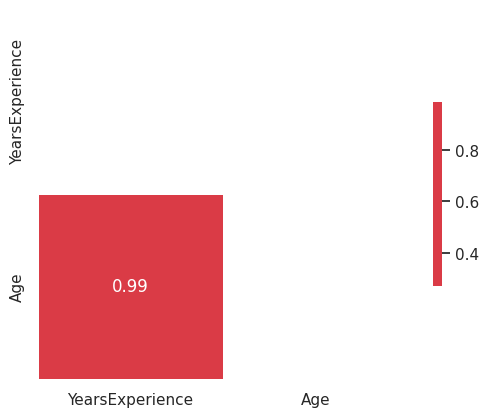

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# correlation matrix
sns.set(style="white")

# compute the correlation matrix
corr = X_salary.corr()

# generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# set up the matplotlib figure
f, ax = plt.subplots()

# generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True);

### Derived Variables

age and salary usually are correlated but ambition can create outliers because a younger person can make a million off a great idea or an older person may be an artist etc.

Ambition = YearsExperience / Age

In [21]:
# combine YearsExperience and Age
X_salary['Ambition'] = X_salary['YearsExperience'] / X_salary['Age']
salary['Ambition'] = salary['YearsExperience'] / salary['Age']
X_salary.corr()

,YearsExperience,Age,Ambition
YearsExperience,1.000000,0.987258,0.972508
Age,0.987258,1.000000,0.925278
Ambition,0.972508,0.925278,1.000000


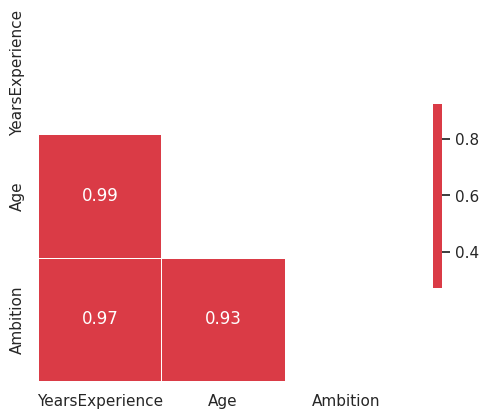

In [22]:
# correlation matrix
sns.set(style="white")

# compute the correlation matrix
corr = X_salary.corr()

# generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# set up the matplotlib figure
f, ax = plt.subplots()

# generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True);

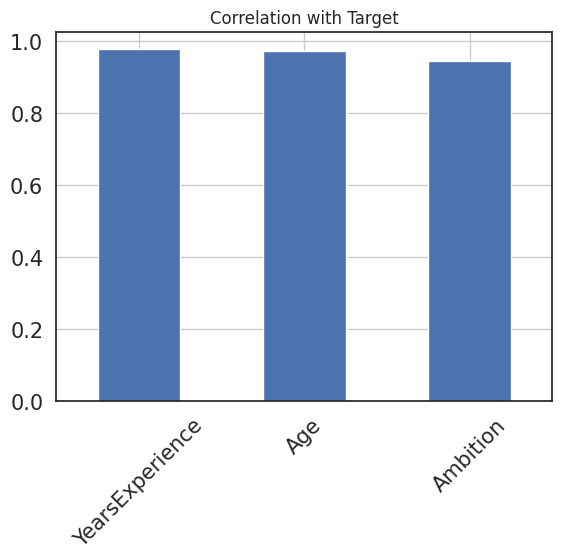

In [24]:
# showing correlation of multiple features with one target
y_salary=salary['Salary']
X_salary.corrwith(y_salary).plot.bar(
        title = "Correlation with Target", fontsize = 15,
        rot = 45, grid = True);

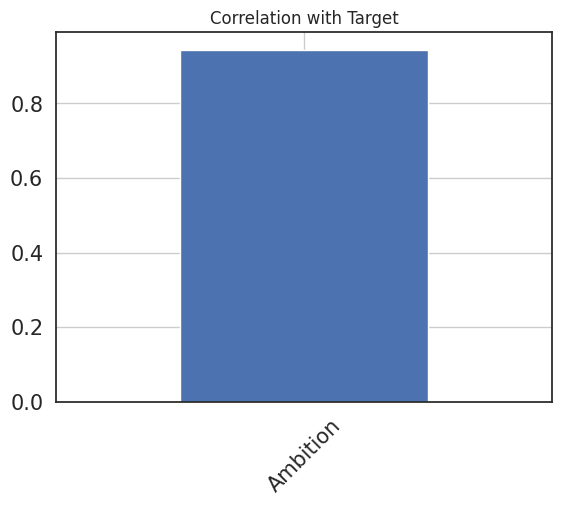

In [25]:
# showing correlation of multiple features with one target
X_salary.drop(['YearsExperience', 'Age'], axis=1).corrwith(y_salary).plot.bar(
        title = "Correlation with Target", fontsize = 15,
        rot = 45, grid = True);

### Mean, Median, Mode Imputation

* Mean if normal
* Median if skewed
* Used for MCAR

In [26]:
# get data
import pandas as pd

houses = pd.read_csv('https://raw.githubusercontent.com/gitmystuff/Datasets/main/house-prices.csv')
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    houses.drop('SalePrice', axis=1),
    houses['SalePrice'],
    test_size=0.25,
    random_state=42)

X_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1023,1024,120,RL,43.0,3182,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2008,WD,Normal
810,811,20,RL,78.0,10140,Pave,NaN,Reg,Lvl,AllPub,...,0,648,Fa,GdPrv,NaN,0,1,2006,WD,Normal
1384,1385,50,RL,60.0,9060,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,10,2009,WD,Normal
626,627,20,RL,NaN,12342,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,GdWo,Shed,600,8,2007,WD,Normal
813,814,20,RL,75.0,9750,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,Shed,500,4,2007,COD,Normal


In [27]:
# find nulls
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1095 entries, 1023 to 1126
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1095 non-null   int64  
 1   MSSubClass     1095 non-null   int64  
 2   MSZoning       1095 non-null   object 
 3   LotFrontage    895 non-null    float64
 4   LotArea        1095 non-null   int64  
 5   Street         1095 non-null   object 
 6   Alley          70 non-null     object 
 7   LotShape       1095 non-null   object 
 8   LandContour    1095 non-null   object 
 9   Utilities      1095 non-null   object 
 10  LotConfig      1095 non-null   object 
 11  LandSlope      1095 non-null   object 
 12  Neighborhood   1095 non-null   object 
 13  Condition1     1095 non-null   object 
 14  Condition2     1095 non-null   object 
 15  BldgType       1095 non-null   object 
 16  HouseStyle     1095 non-null   object 
 17  OverallQual    1095 non-null   int64  
 18  Overa

In [28]:
X_train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      200
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
Length: 80, dtype: int64

In [29]:
#produces feature with the number of missing values
for feat in X_train.columns:
    if X_train[feat].isnull().any():
        print(feat, X_train[feat].isnull().sum())

LotFrontage 200
Alley 1025
MasVnrType 4
MasVnrArea 4
BsmtQual 27
BsmtCond 27
BsmtExposure 27
BsmtFinType1 27
BsmtFinType2 27
Electrical 1
FireplaceQu 512
GarageType 58
GarageYrBlt 58
GarageFinish 58
GarageQual 58
GarageCond 58
PoolQC 1089
Fence 877
MiscFeature 1052


In [30]:
#put all the null fetaures in a list
nulls = [feat for feat in X_train.columns if X_train[feat].isnull().any()]
nulls

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [31]:
# example of some nulls
X_train[['LotFrontage', 'MasVnrArea', 'GarageYrBlt']].isnull().sum()

LotFrontage    200
MasVnrArea       4
GarageYrBlt     58
dtype: int64

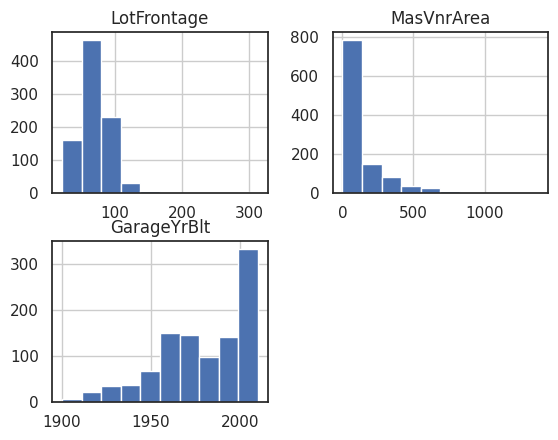

In [32]:
X_train[['LotFrontage', 'MasVnrArea', 'GarageYrBlt']].hist();

In [33]:
# fill na with mean median mode
mmm = pd.DataFrame(columns = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt'])
mmm['LotFrontage'] = X_train['LotFrontage'].fillna(round(X_train['LotFrontage'].mean(), 2))
mmm['MasVnrArea'] = X_train['MasVnrArea'].fillna(X_train['MasVnrArea'].median())
mmm['GarageYrBlt'] = X_train['GarageYrBlt'].fillna(X_train['GarageYrBlt'].mode()[0])
mmm.isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

### Arbitrary Constants

* Discovers if MNAR
* Goal is to flag missing values
* Use values not in distribution
* Importance of missingness if present
* Depends on the model (Linear models maybe not because more arbitrary values in distribution, Trees maybe)

We don't want to impute mean, median, etc because it looks like the data. We want to emphasize the missing data because we believe it's missing not at random.

In [34]:
# recall missing values (non-null)
print(X_train.shape)
print(X_train[nulls].info())

(1095, 80)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1095 entries, 1023 to 1126
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   895 non-null    float64
 1   Alley         70 non-null     object 
 2   MasVnrType    1091 non-null   object 
 3   MasVnrArea    1091 non-null   float64
 4   BsmtQual      1068 non-null   object 
 5   BsmtCond      1068 non-null   object 
 6   BsmtExposure  1068 non-null   object 
 7   BsmtFinType1  1068 non-null   object 
 8   BsmtFinType2  1068 non-null   object 
 9   Electrical    1094 non-null   object 
 10  FireplaceQu   583 non-null    object 
 11  GarageType    1037 non-null   object 
 12  GarageYrBlt   1037 non-null   float64
 13  GarageFinish  1037 non-null   object 
 14  GarageQual    1037 non-null   object 
 15  GarageCond    1037 non-null   object 
 16  PoolQC        6 non-null      object 
 17  Fence         218 non-null    object 
 18  MiscFeature   

In [35]:
X_train['GarageType'].fillna('Missing', inplace=True)
X_train['GarageType'].value_counts()

Attchd     651
Detchd     289
BuiltIn     69
Missing     58
Basment     15
CarPort      7
2Types       6
Name: GarageType, dtype: int64

### End of Distribution

* If normal we can use -3, 3 standard deviations
* If skewed we can use IQR proximity rule (iqr x 1.5, or iqr x 3)
* Flag the missing value where observations are rarely represented
* Used in finances

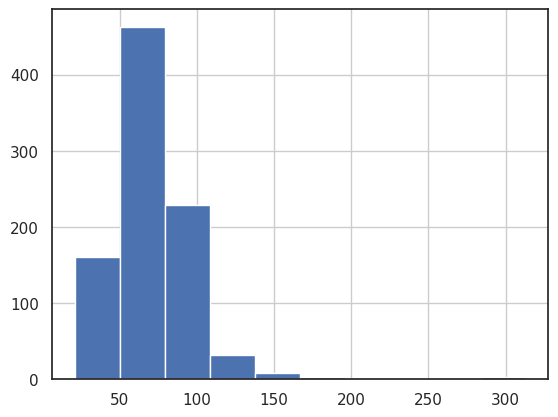

In [36]:
# histogram of LotFrontage
X_train['LotFrontage'].hist();

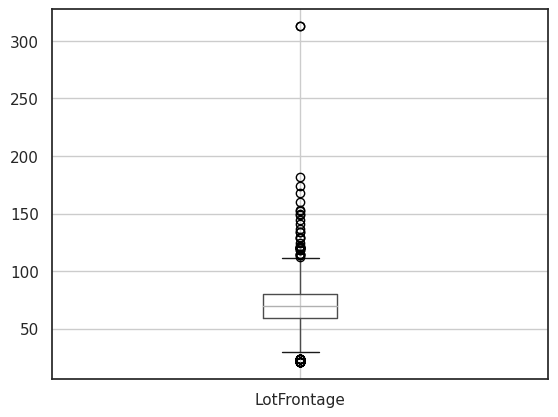

In [37]:
# boxplot of LotFrontage
X_train.boxplot('LotFrontage');

In [38]:
# iqr as na - to get rid of outliers
iqr = X_train['LotFrontage'].quantile(0.75) - X_train['LotFrontage'].quantile(0.25)
end_of_distribution = X_train['LotFrontage'].quantile(0.75) + (1.5 * iqr)
X_train['LotFrontage_Imputed'] = X_train['LotFrontage'].fillna(end_of_distribution)
print(end_of_distribution)
print(X_train['LotFrontage_Imputed'])

111.5
1023     43.0
810      78.0
1384     60.0
626     111.5
813      75.0
        ...  
1095     78.0
1130     65.0
1294     60.0
860      55.0
1126     53.0
Name: LotFrontage_Imputed, Length: 1095, dtype: float64


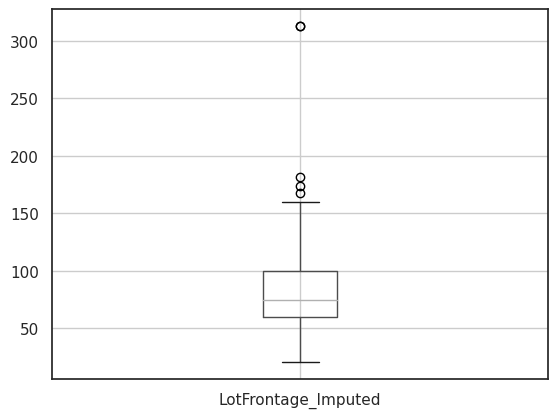

In [39]:
#substituted the mean into the equation
X_train.boxplot('LotFrontage_Imputed');

## Categorical Encoding
* Sklearn One Hot Encoding
* Dummy Trap
* Pandas get_dummies
* Labelizer
* Weight of Evidence
* Frequency Encoding

### Categorical Data
* Nominal (Cat or Dog)
* Ordinal (Grades)
* Works better for limited labels in a category
* Engineer features with many labels

### Multicollinearity
* Predictors need to be independent of each other
* https://www.theanalysisfactor.com/multicollinearity-explained-visually/
* https://statisticsbyjim.com/regression/multicollinearity-in-regression-analysis/
* Cats_and_Dogs = [Cat, Dog, Dog, Cat, Cat, Dog]
* Cats = [1, 0, 0, 1, 1, 0]
* Dogs = [0, 1, 1, 0, 0, 1]

### Mismatch in Training and Test

* Some labels in the train set don't show up in the test set

https://towardsdatascience.com/beware-of-the-dummy-variable-trap-in-pandas-727e8e6b8bde

### One Hot Encoder

In [40]:
# sklearn OneHotEncoder
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html
# https://stackoverflow.com/questions/50473381/scikit-learns-labelbinarizer-vs-onehotencoder
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer

pets = ['dog', 'cat', 'cat', 'dog', 'turtle', 'cat', 'cat', 'turtle', 'dog', 'cat']
#cant use this labels for features . its okay for targets or categorical data
print('cat = 0; dog = 1; turtle = 2')
le = LabelEncoder()
int_values = le.fit_transform(pets)
print('Pets:', pets)
print('Label Encoder:', int_values)
int_values = int_values.reshape(len(int_values), 1)
print(pd.Series(pets))

ohe = OneHotEncoder(sparse_output=False)
ohe = ohe.fit_transform(int_values)
print('One Hot Encoder:\n', ohe)

lb = LabelBinarizer()
print('Label Binarizer:\n', lb.fit_transform(int_values))

cat = 0; dog = 1; turtle = 2
Pets: ['dog', 'cat', 'cat', 'dog', 'turtle', 'cat', 'cat', 'turtle', 'dog', 'cat']
Label Encoder: [1 0 0 1 2 0 0 2 1 0]
0       dog
1       cat
2       cat
3       dog
4    turtle
5       cat
6       cat
7    turtle
8       dog
9       cat
dtype: object
One Hot Encoder:
 [[0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]
Label Binarizer:
 [[0 1 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [1 0 0]]


In [41]:
pets = pd.DataFrame(pd.Series(pets), columns=['Pets'])
pets.head()

,Pets
0,dog
1,cat
2,cat
3,dog
4,turtle


In [45]:
ohe = OneHotEncoder(sparse_output=False)
ohe_pets = ohe.fit_transform(pets)
pets_df = pd.DataFrame(ohe_pets, columns=ohe.get_feature_names_out(['Pets']))
pets_df

,Pets_cat,Pets_dog,Pets_turtle
0,0.0,1.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,0.0,1.0,0.0
4,0.0,0.0,1.0
5,1.0,0.0,0.0
6,1.0,0.0,0.0
7,0.0,0.0,1.0
8,0.0,1.0,0.0
9,1.0,0.0,0.0


### Dummy Trap

The Dummy Variable Trap occurs when two or more dummy variables created by one-hot encoding are highly correlated (multi-collinear). This means that one variable can be predicted from the others, making it difficult to interpret predicted coefficient variables in regression models. In other words, the individual effect of the dummy variables on the prediction model can not be interpreted well because of multicollinearity.

https://www.learndatasci.com/glossary/dummy-variable-trap/

In [47]:
 pets_df.corr()

,Pets_dog,Pets_turtle
Pets_dog,1.000000,-0.327327
Pets_turtle,-0.327327,1.000000


In [48]:
#removes the cats column
ohe = OneHotEncoder(drop='first', sparse_output=False)
ohe_pets = ohe.fit_transform(pets)
pets_df = pd.DataFrame(ohe_pets, columns=ohe.get_feature_names_out(['Pets']))
pets_df

,Pets_dog,Pets_turtle
0,1.0,0.0
1,0.0,0.0
2,0.0,0.0
3,1.0,0.0
4,0.0,1.0
5,0.0,0.0
6,0.0,0.0
7,0.0,1.0
8,1.0,0.0
9,0.0,0.0


In [49]:
 pets_df.corr()

,Pets_dog,Pets_turtle
Pets_dog,1.000000,-0.327327
Pets_turtle,-0.327327,1.000000


### Day of Week Encoding

* https://mikulskibartosz.name/time-in-machine-learning

### Get Dummies

In [50]:
# using pandas get_dummies
import pandas as pd

X_dummy = pd.get_dummies(X_train[['GarageType', 'GarageQual']], drop_first=True)
y_dummy = pd.get_dummies(X_test[['GarageType', 'GarageQual']], drop_first=True)
print(X_dummy.shape)
print(y_dummy.shape)

(1095, 10)
(365, 7)


In [51]:
# using one hot encoder
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(drop='first', sparse_output=False)

ohe_train = ohe.fit_transform(X_train[['GarageType', 'GarageQual']].dropna())
ohe_train = pd.DataFrame(ohe_train, columns=ohe.get_feature_names_out(['GarageType', 'GarageQual']))
print(ohe_train.shape)
ohe_train.head()

(1037, 9)


,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [52]:
# ohe is already trained
ohe_test = ohe.transform(X_test[['GarageType', 'GarageQual']].dropna())
ohe_test = pd.DataFrame(ohe_test, columns=ohe_train.columns)
print(ohe_test.shape)
ohe_test.head()

(342, 9)


,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### One Hot Encoding Alternatives

For features with many labels

* https://medium.com/analytics-vidhya/stop-one-hot-encoding-your-categorical-variables-bbb0fba89809
* https://medium.com/swlh/stop-one-hot-encoding-your-categorical-features-avoid-curse-of-dimensionality-16743c32cea4
* https://towardsdatascience.com/all-about-categorical-variable-encoding-305f3361fd02 (frequency and mean encoding)

In [53]:
# review features with multiple labels - frequency encoding
# identify features with more than 5 features
mult_labels = []
freq_feats = []

for val in X_train.columns.sort_values():
  if val in nulls:
    print(val, len(X_train[val].dropna().unique()))
    mult_labels.append(val)
    if len(X_train[val].dropna().unique()) > 4:
      freq_feats.append(val)

print(mult_labels)
print(freq_feats)

Alley 2
BsmtCond 4
BsmtExposure 4
BsmtFinType1 6
BsmtFinType2 6
BsmtQual 4
Electrical 4
Fence 4
FireplaceQu 5
GarageCond 5
GarageFinish 3
GarageQual 5
GarageType 7
GarageYrBlt 94
LotFrontage 105
MasVnrArea 278
MasVnrType 4
MiscFeature 4
PoolQC 3
['Alley', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'Electrical', 'Fence', 'FireplaceQu', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'LotFrontage', 'MasVnrArea', 'MasVnrType', 'MiscFeature', 'PoolQC']
['BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageCond', 'GarageQual', 'GarageType', 'GarageYrBlt', 'LotFrontage', 'MasVnrArea']


In [54]:
# fill frequency
print(X_train['GarageType'].value_counts())
for feat in freq_feats:
    freq = X_train.groupby(feat).size()/len(X_train)
    X_train[feat] = X_train[feat].map(freq)
    freq = X_test.groupby(feat).size()/len(X_test)
    X_test[feat] = X_test[feat].map(freq)

print(X_train['GarageType'].value_counts())
print(X_train['GarageType'].value_counts(normalize=True))

Attchd     651
Detchd     289
BuiltIn     69
Missing     58
Basment     15
CarPort      7
2Types       6
Name: GarageType, dtype: int64
0.594521    651
0.263927    289
0.063014     69
0.052968     58
0.013699     15
0.006393      7
0.005479      6
Name: GarageType, dtype: int64
0.594521    0.594521
0.263927    0.263927
0.063014    0.063014
0.052968    0.052968
0.013699    0.013699
0.006393    0.006393
0.005479    0.005479
Name: GarageType, dtype: float64


### Bi-Label Mapping

In [55]:
# get and train test split data
import seaborn as sns
from sklearn.model_selection import train_test_split

titanic = sns.load_dataset('titanic')
X_train, X_test, y_train, y_test = train_test_split(titanic.drop(['survived'], axis=1), titanic['survived'], test_size=.25, random_state=42)
X_train.head()

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
298,1,male,NaN,0,0,30.5000,S,First,man,True,C,Southampton,yes,True
884,3,male,25.00,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True
247,2,female,24.00,0,2,14.5000,S,Second,woman,False,NaN,Southampton,yes,False
478,3,male,22.00,0,0,7.5208,S,Third,man,True,NaN,Southampton,no,True
305,1,male,0.92,1,2,151.5500,S,First,child,False,C,Southampton,yes,False


In [56]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [57]:
titanic.nunique()

survived         2
pclass           3
sex              2
age             88
sibsp            7
parch            7
fare           248
embarked         3
class            3
who              3
adult_male       2
deck             7
embark_town      3
alive            2
alone            2
dtype: int64

In [58]:
titanic.sex.values_counts()

AttributeError: 'Series' object has no attribute 'values_counts'

In [59]:
# bi-label mapping
# whatever you do for X_train, do for X_test
X_train['sex'] = X_train['sex'].map({'male':0,'female':1})
X_test['sex'] = X_test['sex'].map({'male':0,'female':1})
X_train.head()

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
298,1,0,NaN,0,0,30.5000,S,First,man,True,C,Southampton,yes,True
884,3,0,25.00,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True
247,2,1,24.00,0,2,14.5000,S,Second,woman,False,NaN,Southampton,yes,False
478,3,0,22.00,0,0,7.5208,S,Third,man,True,NaN,Southampton,no,True
305,1,0,0.92,1,2,151.5500,S,First,child,False,C,Southampton,yes,False


### Encoding Order

* Bilabel Mapping (2 labels)
* Frequency (5+ labels)
* One Hot Encoding (3 - 5 labels)

## Outliers

* Treat outliers as missing data and impute accordingly
* Impose min max values
* Take care of altering meaningful data
* Outliers should be detected and removed from train only

https://www.projectpro.io/recipes/deal-with-outliers-in-python

* Drop
* Mark
* Rescale

In [60]:
# get data
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [61]:
# get keys
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [62]:
# create housing dataframe
import pandas as pd

housing_df = pd.DataFrame(housing.data, columns=housing.feature_names)
housing_df['MedHouseVal'] = housing.target
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [63]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    housing_df.drop('MedHouseVal', axis=1),
    housing_df['MedHouseVal'],
    test_size=0.25,
    random_state=42)

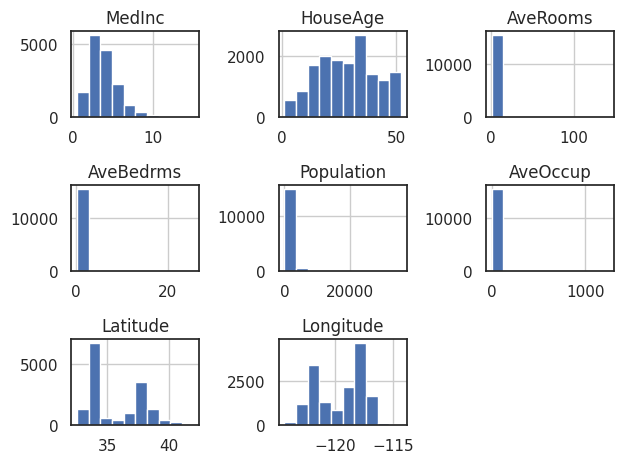

In [64]:
# histograms
import matplotlib.pyplot as plt

X_train.hist()
#expands everything
plt.tight_layout()

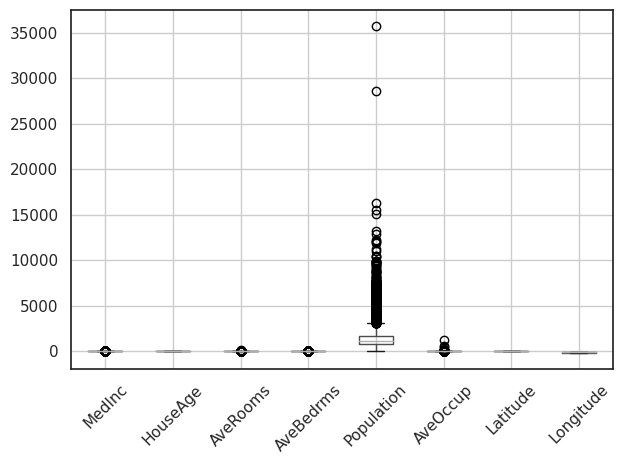

In [65]:
# boxplots
X_train.boxplot(rot=45)
plt.tight_layout()

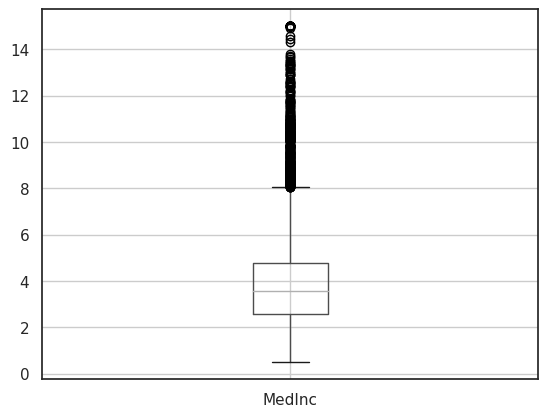

In [66]:
X_train.boxplot('MedInc');

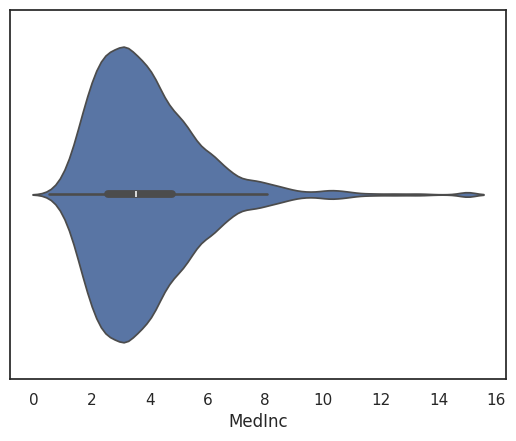

In [67]:
import seaborn as sns

sns.violinplot(x=X_train['MedInc']);

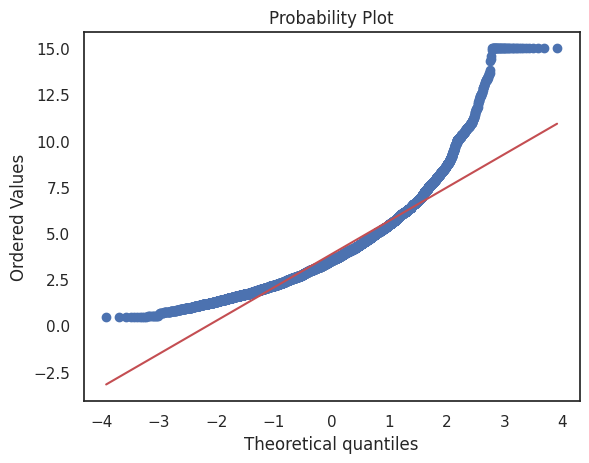

In [68]:
# prob plot
import scipy.stats as stats

stats.probplot(X_train['MedInc'], plot=plt);

#### Boxplot and Normal Curve Review

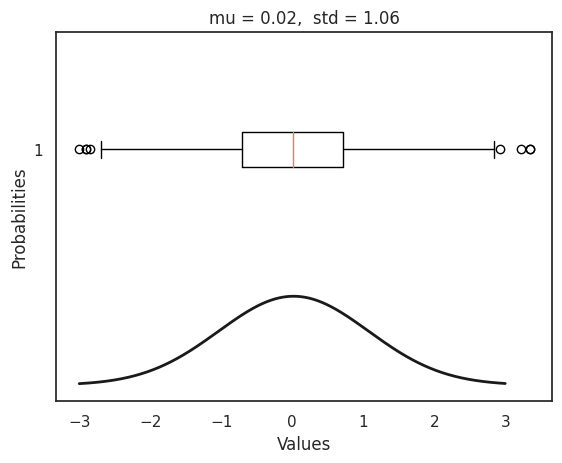

In [69]:
# compare boxplot with normal distribution
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

data = stats.norm.rvs(size=1000)
mu, std = stats.norm.fit(data)

x = np.linspace(-3, 3, 1000)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.boxplot(data, vert=False)
plt.xlabel('Values')
plt.ylabel('Probabilities')
plt.title(f'mu = {mu:.2f},  std = {std:.2f}')

plt.show()

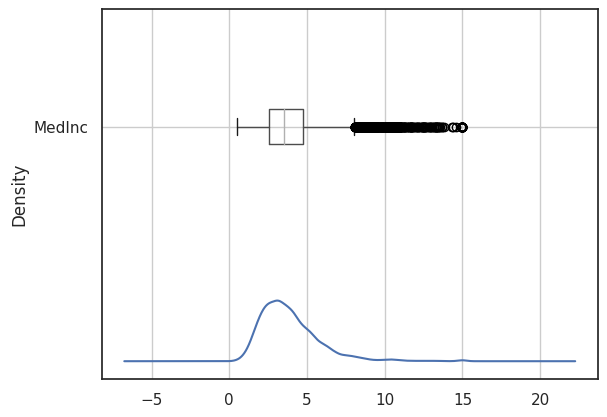

In [70]:
# compare with AveBedrms
X_train['MedInc'].plot.kde()
X_train.boxplot('MedInc', vert=False);

In [71]:
# find iqr and inner outer boundaries
q1 = X_train['MedInc'].quantile(0.25)
q3 = X_train['MedInc'].quantile(0.75)
iqr = q3 - q1

lower_inner_fence = q1 - (1.5 * iqr)
upper_inner_fence = q3 + (1.5 * iqr)
lower_outer_fence = q1 - (1.5 * iqr)
upper_outer_fence = q3 + (1.5 * iqr)

print(f'Q1: {q1:.2f} - Q3: {q3:.2f}')

Q1: 2.57 - Q3: 4.76


In [72]:
# print outliers by feature
for feat in X_train._get_numeric_data().columns[1:]:
    q1 = X_train[feat].quantile(0.25)
    q3 = X_train[feat].quantile(0.75)
    iqr = q3 - q1
    lower_fence = (q1 - 1.5 * iqr)
    upper_fence = (q3 + 1.5 * iqr)
    lower_count = X_train[feat][X_train[feat] < lower_fence].count()
    upper_count = X_train[feat][X_train[feat] > upper_fence].count()
    print(f'{feat} outliers = {lower_count + upper_count}: lower_fence: {lower_fence}, upper_fence: {upper_fence}, lower_count: {lower_count}, upper_count: {upper_count}')

HouseAge outliers = 0: lower_fence: -10.5, upper_fence: 65.5, lower_count: 0, upper_count: 0
AveRooms outliers = 393: lower_fence: 2.037789153370117, upper_fence: 8.470351411049805, lower_count: 38, upper_count: 355
AveBedrms outliers = 1084: lower_fence: 0.866268363721791, upper_fence: 1.2404684780460993, lower_count: 146, upper_count: 938
Population outliers = 887: lower_fence: -618.625, upper_fence: 3134.375, lower_count: 0, upper_count: 887
AveOccup outliers = 544: lower_fence: 1.1554832731192153, upper_fence: 4.554741594313875, lower_count: 7, upper_count: 537
Latitude outliers = 0: lower_fence: 28.269999999999996, upper_fence: 43.39, lower_count: 0, upper_count: 0
Longitude outliers = 0: lower_fence: -127.48499999999999, upper_fence: -112.32500000000002, lower_count: 0, upper_count: 0


In [73]:
# check our numbers
X_train['MedInc'].describe()

count    15480.000000
mean         3.878314
std          1.903788
min          0.499900
25%          2.566925
50%          3.543900
75%          4.762500
max         15.000100
Name: MedInc, dtype: float64

### Outlier Trimming

In [74]:
# flag the rows with outliers
import numpy as np

outliers = np.where(X_train['MedInc'] < lower_inner_fence, True,
                   np.where(X_train['MedInc'] > upper_inner_fence, True, False))

X_train_trimmed = X_train.loc[outliers]
print(X_train.shape, X_train_trimmed.shape)

(15480, 8) (505, 8)


### IQR Proximity Rule Capping

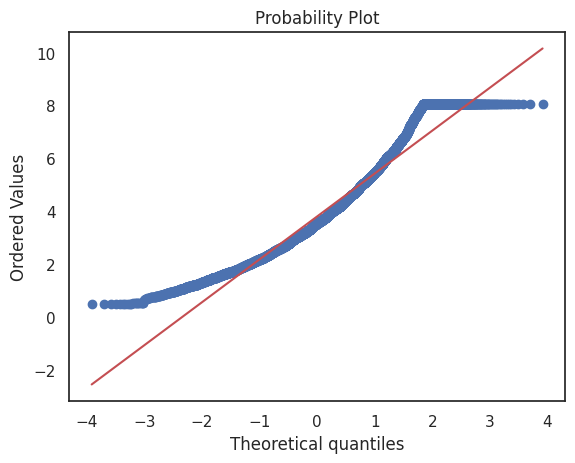

In [75]:
# cap outliers
import scipy.stats as stats

X_train['capped'] = np.where(X_train['MedInc'] < lower_inner_fence, lower_inner_fence,
                   np.where(X_train['MedInc'] > upper_inner_fence, upper_inner_fence, X_train['MedInc']))

stats.probplot(X_train['capped'], plot=plt);

## Scaling

* Coefficients of linear models are influenced by the scale of the feature
* Features with larger scales dominate smaller scales
* Some algorithms, like PCA, require features to be centered at 0

https://www.atoti.io/articles/when-to-perform-a-feature-scaling/

* from sklearn.preprocessing import MinMaxScaler
* from sklearn.preprocessing import minmax_scale
* from sklearn.preprocessing import MaxAbsScaler
* from sklearn.preprocessing import StandardScaler
* from sklearn.preprocessing import RobustScaler
* from sklearn.preprocessing import Normalizer
* from sklearn.preprocessing import QuantileTransformer
* from sklearn.preprocessing import PowerTransformer

https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html

### Standardization

$z = \frac{(x - \bar{x})}{\sigma}$

* Centers data around 0
* Scales the std to 1
* Preserves original shape
* Preserves outliers

In [76]:
X_train.drop('capped', axis=1, inplace=True)
X_train.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,15480.000000,15480.000000,15480.000000,15480.000000,15480.000000,15480.000000,15480.00000,15480.000000
mean,3.878314,28.595995,5.435598,1.096881,1427.497287,3.106660,35.64672,-119.583736
std,1.903788,12.611330,2.421650,0.438804,1142.930862,11.955834,2.13395,2.002442
min,0.499900,1.000000,0.888889,0.333333,3.000000,0.692308,32.55000,-124.350000
25%,2.566925,18.000000,4.450000,1.006593,788.750000,2.430205,33.94000,-121.800000
50%,3.543900,29.000000,5.232331,1.049346,1167.000000,2.817672,34.27000,-118.510000
75%,4.762500,37.000000,6.058141,1.100143,1727.000000,3.280020,37.72000,-118.010000
max,15.000100,52.000000,141.909091,25.636364,35682.000000,1243.333333,41.95000,-114.310000


Characteristics of X_train
* Mean values not centered around 0
* Std not 1
* Features have various magnitudes

In [77]:
# standardize features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
standardized_X = scaler.transform(X_train)
standardized_yX = scaler.transform(X_test) # we use the scaler that was trained on the X_train
X_train_standardized = pd.DataFrame(standardized_X, columns=X_train.columns)
X_train_standardized.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,1.548000e+04,1.548000e+04,1.548000e+04,1.548000e+04,1.548000e+04,1.548000e+04,1.548000e+04,1.548000e+04
mean,2.074711e-16,-1.232434e-16,-1.620294e-16,7.435912e-17,-8.996536e-17,1.055716e-17,7.890329e-16,2.206676e-15
std,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00
min,-1.774632e+00,-2.188261e+00,-1.877586e+00,-1.740123e+00,-1.246395e+00,-2.019458e-01,-1.451215e+00,-2.380303e+00
25%,-6.888537e-01,-8.402236e-01,-4.070076e-01,-2.057655e-01,-5.588859e-01,-5.658128e-02,-7.998196e-01,-1.106817e+00
50%,-1.756629e-01,3.203613e-02,-8.394015e-02,-1.083316e-01,-2.279278e-01,-2.417208e-02,-6.451718e-01,5.362306e-01
75%,4.644500e-01,6.664069e-01,2.570818e-01,7.434708e-03,2.620564e-01,1.450051e-02,9.716009e-01,7.859338e-01
max,5.842113e+00,1.855852e+00,5.635739e+01,5.592539e+01,2.997172e+01,1.037374e+02,2.953905e+00,2.633738e+00


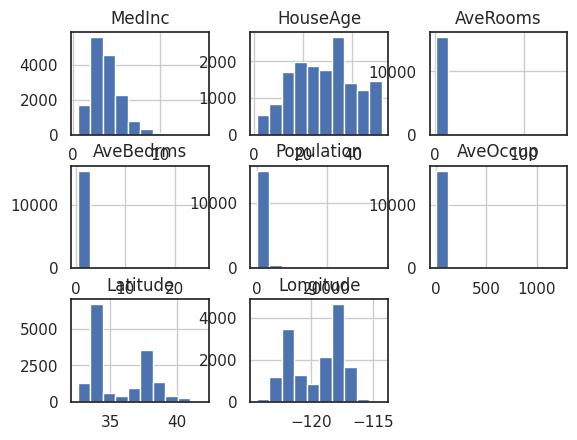

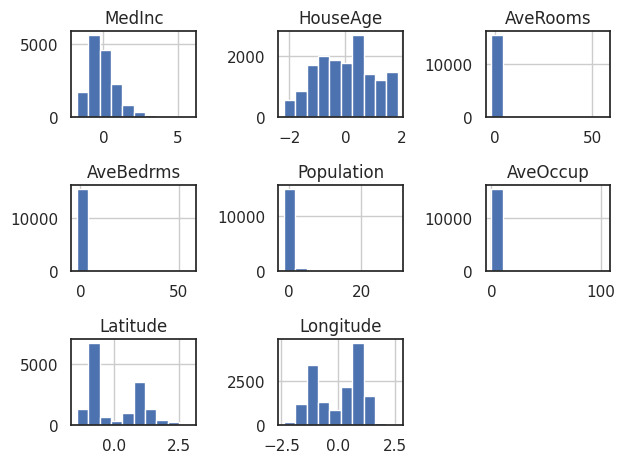

In [78]:
# compare histograms
X_train.hist()
X_train_standardized.hist()
plt.tight_layout();

### MinMaxScaling (Normalization)

* Does not center the mean around 0
* Std (variance) differ
* May not preserve original shape
* 0 to 1 range
* Sensitive to outliers

In [79]:
# minmax scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
minmax = scaler.transform(X_train)
# don't forget X_test
X_train_minmax = pd.DataFrame(minmax, columns=X_train.columns)
X_train_minmax.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,15480.000000,15480.000000,15480.000000,15480.000000,15480.000000,15480.000000,15480.000000,15480.000000
mean,0.232991,0.541098,0.032242,0.030176,0.039925,0.001943,0.329438,0.474728
std,0.131294,0.247281,0.017172,0.017342,0.032034,0.009621,0.227016,0.199446
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.142551,0.333333,0.025252,0.026608,0.022023,0.001399,0.147872,0.253984
50%,0.209928,0.549020,0.030800,0.028298,0.032624,0.001710,0.182979,0.581673
75%,0.293968,0.705882,0.036656,0.030305,0.048320,0.002082,0.550000,0.631474
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


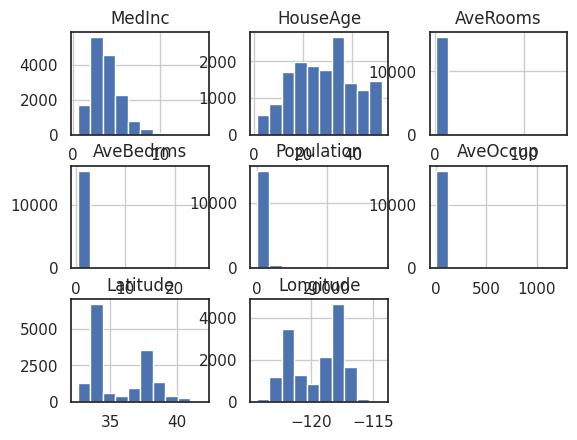

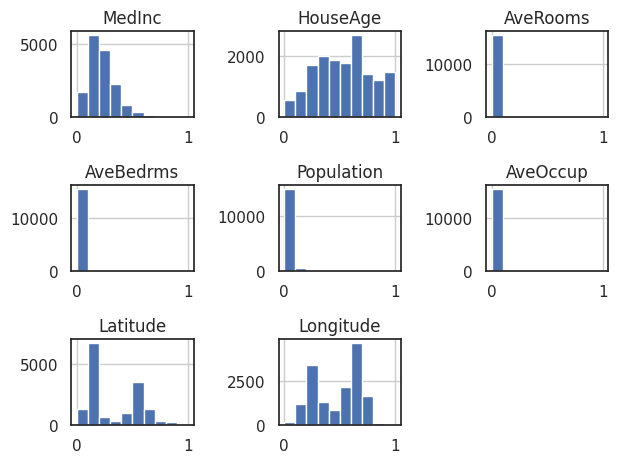

In [80]:
# visual comparison
X_train.hist()
X_train_minmax.hist()
plt.tight_layout();

### Mean Normalization

* Centers the mean at 0
* Std (variance) will differ
* May alter original distribution
* -1 to 1 range
* Preserves outliers

In [ ]:
# # find the means
# means = X_train.mean(axis=0)
# means

In [ ]:
# # find the ranges
# ranges = X_train.max(axis=0) - X_train.min(axis=0)
# ranges

In [ ]:
# # mean scale the data
# X_train_meanscale = (X_train - means) / ranges
# # don't forget X_test
# X_train_meanscale.describe()

In [ ]:
# # visual comparison
# X_train.hist()
# X_train_meanscale.hist()
# plt.tight_layout();

### RobustScaler

* Replaces median with iqr
* Variance varies
* May not preserve distribution
* Min max varies
* Robust to outliers https://www.statisticshowto.com/robust-statistics/

In [ ]:
# # robust scaler
# from sklearn.preprocessing import RobustScaler

# scaler = RobustScaler()
# scaler.fit(X_train)
# robust = scaler.transform(X_train)
# # don't forget X_test
# X_train_robust = pd.DataFrame(robust, columns=X_train.columns)
# X_train_robust.describe()

In [ ]:
# # visual comparison
# X_train.hist()
# X_train_robust.hist()
# plt.tight_layout();

### PowerTransformers

In [ ]:
# # PowerTransformer scaler for outliers
# from sklearn.preprocessing import PowerTransformer

# feat_scales = []

# scaler = PowerTransformer()

# for feat in feat_scales:
#     X_train[feat] = scaler.fit_transform(X_train[feat].values.reshape(-1,1))

# for feat in feat_scales:
#     X_test[feat] = scaler.fit_transform(X_test[feat].values.reshape(-1,1))

### Scaling to Unit Length

* Scales a feature vector to 1, norm of 1
* Normalizes feature not observation
* Divides each observation vector by some norm
* Manhattan distance (l1)
* Euclidean distance (12)

l1(X) = |x1| + |x2| ... + |xn|

l2(X) = square root of x1^2 + x2^2 ... + xn^2

* https://en.wikipedia.org/wiki/Taxicab_geometry
* https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html
* https://montjoile.medium.com/l0-norm-l1-norm-l2-norm-l-infinity-norm-7a7d18a4f40c
* https://www.atoti.io/articles/when-to-perform-a-feature-scaling/

In [ ]:
# # unit length scaling
# from sklearn.preprocessing import Normalizer

# scaler = Normalizer('l1')
# scaler.fit(X_train)
# unitlength = scaler.transform(X_train)
# # don't forget X_test
# X_train_unitlength = pd.DataFrame(unitlength, columns=X_train.columns)
# X_train_unitlength.describe()

In [ ]:
# # recall values from original X_train
# X_train.head()

In [ ]:
# # normalize the values
# np.round( np.linalg.norm(X_train, ord=1, axis=1), 1)

In [ ]:
# # compare the following with the first value in X_train_unitlength.head() below
# 4.2 / 1062

In [ ]:
# # see above
# X_train_unitlength.head()

In [ ]:
# # visual comparison
# X_train.hist()
# X_train_unitlength.hist()
# plt.tight_layout();